Part of course work Data Analytics for cyber security 

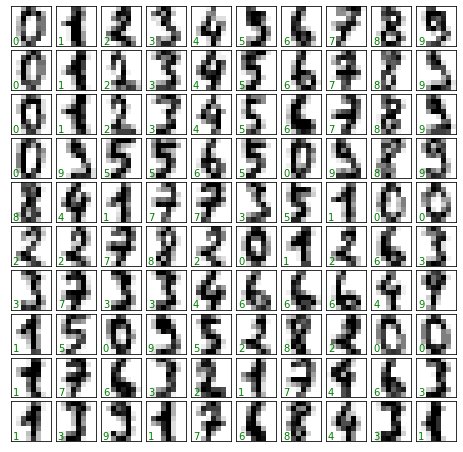

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
# we have 1797 images, and 64 features (pixels)
X = digits.data
X.shape

(1797, 64)

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=2)
pca.fit(X)
X_2D = pca.transform(X)         # 4. Transform the data to two dimensions


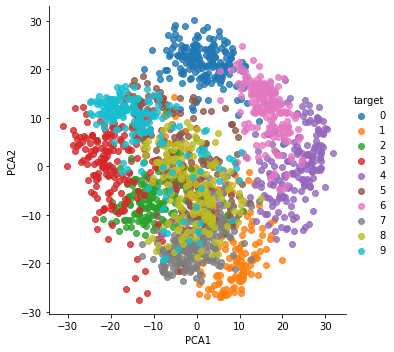

In [ ]:
import seaborn as sns
import pandas as pd
import numpy


plot=dict()
plot['PCA1'] = numpy.array(X_2D[:, 0])
plot['PCA2'] = numpy.array(X_2D[:, 1])
plot['target'] = [digits.target[i] for i in range(len(digits.target))]
plot=pd.DataFrame(plot)

sns.lmplot("PCA1", "PCA2", data=plot, hue='target',fit_reg=False);

<h2>Isomaps are a technique with a similar goal</h2>

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

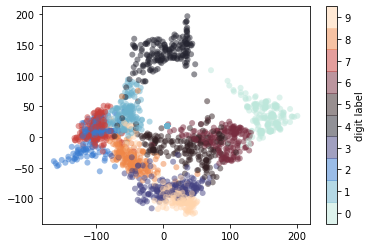

In [ ]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('icefire', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

<h2>Applying a Bayesian Classifier</h2>

In [ ]:
from sklearn.model_selection import train_test_split
y=digits.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

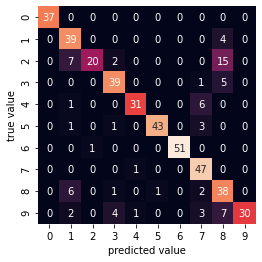

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');